# Checking if there is still a bias in Fandango Movie ratings 

In October 2015, a data journalist found strong evidence that Fandango's rating system was biased by comparing the number of displayed to the users and the actual one found in html's datas. 
(He wrote his conclusions <a href ="https://fivethirtyeight.com/features/fandango-movies-ratings/">here </a>).
#### The main objectif of our study is to verify if Fandango has (or hasn't) corrected that bias for the 2016/2017 years. 

In [4]:
import pandas as pd 
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

In [6]:
# This dataset was collected before the article, hence the name "before": 
before = pd.read_csv('/content/drive/MyDrive/Dataquest/Fandango_datas/fandango_score_comparison.csv') 

# This dataset was collected after the article, hence the name "after":
after = pd.read_csv('/content/drive/MyDrive/Dataquest/Fandango_datas/movie_ratings_16_17.csv')

In [7]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [8]:
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


### Isolating the Fandango datas in the "before" dataset : 

In [9]:
before_fan = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()

# check the result
print(before_fan.head())

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  


### Isolating the Fandango datas in the "after" dataset : 

In [10]:
after_fan = after[['movie', 'year', 'fandango']].copy()

# check the result
print(after_fan.head())

                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0


### According to the readme.md files from each dataset (<a href = "https://github.com/fivethirtyeight/data/blob/master/fandango/README.md">here </a> and <a href = "https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md">here </a>), we can establish that : 
<ul>
    <li> The "before" dataset selected, from all movies rated on every of 5 plateform compared, those who get more than 30 reviews </li>
    <li> The "after" dataset selected the 214 most popular movies released in 2016 or 2017, each of them being rated on the 5 plateform </li>
</ul>

<br>

At this point we see that we should refined our original interrogation, that become : <br>
<h2><i> Is there a significant variation in the ratings Fandango attributed to the most popular movies,
    between 2015 VS 2016 ?</i></h2> 
    


Check if there is a movie rated in 2015 with less than 30 ratings : 

In [11]:
sum(before_fan['Fandango_votes'] < 30)

0

Everything is ok. <br><br>
<i><b>NB : Unfortunately, the Fandango public datas don't allow us to check how many ratings the most popular movies had in 2016 or 2017. <br>For the sake of the exercice, we will work with the assumption that if a movie is rated as popular, it has been seen by a minimum amout of people, 30 being a very low limit to call a movie "popular".</i></b> 

### Isolating the 2015 movies froms the 2014 ones, in the "before" dataset : 

In [12]:
# The release year is in the FILM title, so we create a new column with the isolated year : 

before_fan['Year'] = before_fan['FILM'].str[-5:-1]
before_fan.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [13]:
# We copy, create, and count this new dataset :

fand_2015 = before_fan[before_fan['Year'] == '2015'].copy()
fand_2015['Year'].value_counts()
print(fand_2015)

                                          FILM  Fandango_Stars  \
0               Avengers: Age of Ultron (2015)             5.0   
1                            Cinderella (2015)             5.0   
2                               Ant-Man (2015)             5.0   
3                       Do You Believe? (2015)             5.0   
4                Hot Tub Time Machine 2 (2015)             3.5   
..                                         ...             ...   
140                          Inside Out (2015)             4.5   
141                          Mr. Holmes (2015)             4.0   
142                                 '71 (2015)             3.5   
144  Gett: The Trial of Viviane Amsalem (2015)             3.5   
145         Kumiko, The Treasure Hunter (2015)             3.5   

     Fandango_Ratingvalue  Fandango_votes  Fandango_Difference  Year  
0                     4.5           14846                  0.5  2015  
1                     4.5           12640                  0.5  2

### Isolating the 2016 movies froms the 2017 ones, in the "after" dataset : 

In [14]:
fand_2016 = after_fan[after_fan['year'] == 2016].copy()
fand_2016['year'].value_counts()

# Check the result : 
print(fand_2016)




                       movie  year  fandango
0        10 Cloverfield Lane  2016       3.5
1                   13 Hours  2016       4.5
2        A Cure for Wellness  2016       3.0
4    A Hologram for the King  2016       3.0
5            A Monster Calls  2016       4.0
..                       ...   ...       ...
207    Whiskey Tango Foxtrot  2016       3.5
208                 Why Him?  2016       4.0
209        X-Men: Apocalypse  2016       4.0
212              Zoolander 2  2016       2.5
213                 Zootopia  2016       4.5

[191 rows x 3 columns]


### Creating two kernel density plots on the same figure to compare the distribution of movie ratings of each sample :


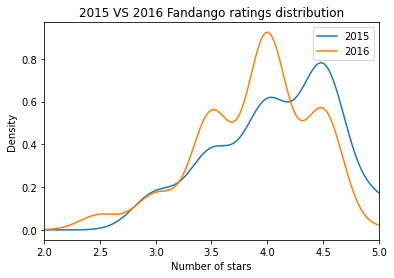

In [15]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline


plt.title("2015 VS 2016 Fandango ratings distribution")
plt.xlabel('Number of stars')

fand_2015['Fandango_Stars'].plot.kde(label='2015')
fand_2016['fandango'].plot.kde(label='2016')
plt.legend()
plt.xticks([2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlim(2,5)

plt.style.use('fivethirtyeight')
plt.show()

## Both distributions are strongly left skewed, but the 2016 ratings distribution appears to be lower than the 2015's one. 


#### At first sight, it suggest that Fadango indeed changed its rating system in a more critical way, but let's investigate further before any definitive conclusion.



In [16]:

# We check the distribution of ratings for 2015 : 
perc_rat_2015 = fand_2015['Fandango_Stars'].value_counts(normalize = True)*100
print('Ratings of 2015 are distributed as follow :')
print(perc_rat_2015.sort_index(ascending=True))
print('\n')

# And the distribution of ratings for 2016 : 
print('Ratings of 2016 are distributed as follow :')
perc_rat_2016 = fand_2016['fandango'].value_counts(normalize = True)*100
print(perc_rat_2016.sort_index(ascending=True))

Ratings of 2015 are distributed as follow :
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64


Ratings of 2016 are distributed as follow :
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


#### If the 4.5 rating is far more given in 2015 than in 2016 (38% VS 24%), we notice that in contrast, the 4.0 rating is far more given in 2016 than in 2015 (40% VS 29%).

### To solve this ambiguity, let's check in wich direction the change is globally occuring : 


In [17]:
# We create a dataframe with the mean, median, and mode values : 

mean_2015 = fand_2015['Fandango_Stars'].mean()
mean_2016 = fand_2016['fandango'].mean()

median_2015 = fand_2015['Fandango_Stars'].median()
median_2016 = fand_2016['fandango'].median()

mode_2015 = fand_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fand_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary



,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


### And put those results in a bar chart for better visualization : 


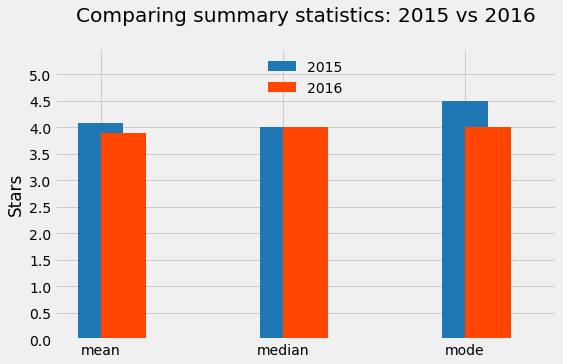

In [18]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = 'tab:blue', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = 'orangered', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

<h3><b>The variation in detail indicate a correction af the overrating bias.
    <br><br>
    Lest's finally calulate the variation of the mean between th two years :</b></h3> 
    <br>

In [19]:
round((summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0] * 100, 2)

4.84

# CONCLUSION

### If we can't say without any doubt that Fandango corrected the overrating bias, our analysis allow us to say that the ratings of the more popular movies from 2016, comparing to thoses from 2015, are indeed not so enthusiastic, with a global decrease of 4.9% overall. 